<a href="https://colab.research.google.com/github/Erickpython/kodeCamp_5X-MachineLearning/blob/main/Copy_of_Task_Starter_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Activation functions and Gradients**

Backpropagation is a critical part of multilayer training neural networks. Even though in today's frameworks, the backpropagation part is implemented automatically and hidden from the user, it is always a great idea to have an understanding of the principles.

For a single neuron, backpropagation is done by applying the gradient of the output to the gradient of the activation function, before applying that resulting combined gradient to the input parameters or weights. This is what is known as the chain rule.

This notebook contains a simple implementation of a single neuron, with different activation function and activation function gradient implementations.

The first one ReLU has been completed as an example. You are expected to fill the implementations for the remaining functions.

Here is a Wikepedia reference for all the activation functions:
https://en.wikipedia.org/wiki/Activation_function

**NOTE: DO NOT CHANGE CODE ANYWHERE ELSE!!**

## **Forward Propagation**
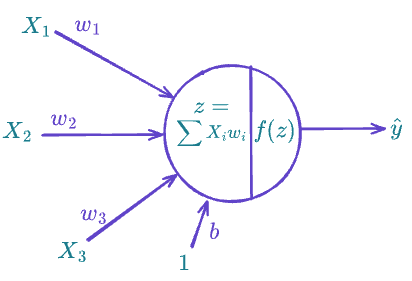

## **Backward Propagation**
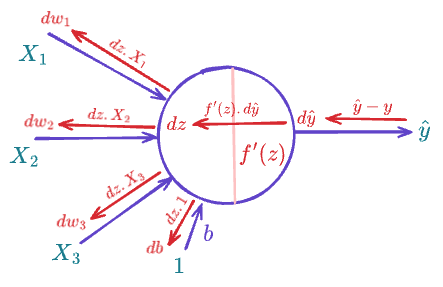

In [1]:
#====================================================================
#          DO NOT CHANGE CODE HERE!!!
#====================================================================
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from IPython.display import Markdown

In [2]:
# Sample implementation.
# ReLU and Gradient of ReLU
def relu(z):
    return np.maximum(0, z)

def back_relu(z):
    return (z > 0).astype(float)


In [3]:
def linear(z):
    # Implement the linear function
    return None

def back_linear(z):
    # Implement the gradient of the linear function
    return None

In [4]:
def tanh(z):
    # Implement the tanh function
    return None

def back_tanh(z):
    # Implement the gradient of the tanh function
    return None

In [5]:
def sigmoid(z):
    # Implement the sigmoid function
    return None

def back_sigmoid(z):
    # Implement the gradient of the sigmoid function
    return None

In [6]:
def elu(z, alpha = 1.0):
    # Implement the elu function
    return None

def back_elu(z, alpha = 1.0):
    # Implement the gradient of the elu function
    return None

In [7]:
def lrelu(z, alpha = 1e-2):
    # Implement the leaky relu function
    return None

def back_lrelu(z, alpha = 1e-2):
    # Implement the gradient of the leaky relu function
    return None

In [8]:
def swish(z):
    # Implement the swish function
    return None

def back_swish(z):
    # Implement the gradient of the swish function
    return None

In [9]:
#====================================================================
#          DO NOT CHANGE CODE HERE!!!
#====================================================================

ACTIVATIONS = {
    "relu": (relu, back_relu),
    "linear": (linear, back_linear),
    "sigmoid": (sigmoid, back_sigmoid),
    "tanh": (tanh, back_tanh),
    "elu": (elu, back_elu),
    "lrelu": (lrelu, back_lrelu),
    "swish": (swish, back_swish),
}

class Neuron:

    def __init__(self, input_size, act = "relu", **act_kwargs):
        self.input_size = input_size
        self.weights = np.random.random(input_size)
        self.bias = np.random.random()
        self.act = act
        self.act_kwargs = act_kwargs

    def activation(self, z, **kwargs):
        act = ACTIVATIONS.get(self.act)
        if act is not None:
            return act[0](z, **kwargs)
        return None

    def forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z, **self.act_kwargs)

    def act_gradient(self, z, **kwargs):
        act = ACTIVATIONS.get(self.act)
        if act is not None:
            return act[1](z, **kwargs)
        return None

    def backward(self, X, y, y_hat):
        # Gradient of loss w.r.t. output
        dL_dy_hat = (y_hat - y)

        # Gradient of loss w.r.t. activation function
        z = np.dot(X, self.weights) + self.bias
        dL_dz = dL_dy_hat * self.act_gradient(z, **self.act_kwargs)

        # Gradient of loss w.r.t. each parameter.
        dL_dw = np.dot(X.T, dL_dz) / X.shape[0]
        dL_db = np.sum(dL_dz) / X.shape[0]
        return dL_dw, dL_db

In [10]:
#====================================================================
#          DO NOT CHANGE CODE HERE!!!
#====================================================================

def train_neuron(neuron, X, y, epochs=100, lr=0.01):
    losses = []
    pbar = tqdm(range(epochs), desc='Training')

    for epoch in pbar:
        # prediction
        y_hat = n.forward(X)

        # mse loss
        loss = np.mean((y_hat - y)**2)

        # backward pass / gradient
        dm, db = n.backward(X, y, y_hat)

        # update the weights
        n.weights -= alpha * dm
        n.bias -= alpha * db

        losses.append(loss)

        # Update progress bar with current loss
        pbar.set_postfix({'Loss': f'{loss:.4f}'})

    print(f"\nTraining complete! Final Loss: {loss:.4f}")
    return losses

## **Train a single neuron on regression.**

Train a single neuron on the data that contains 3 independent variables and 1 dependent variable.

In [ ]:
#====================================================================
#          DO NOT CHANGE CODE HERE!!!
#====================================================================

import pandas as pd
# Google sheet.

google_sheet_id = '1fUWevh79VD3-8YzCZU-uUC1_LJfif5Y7_eX9dkUOe_o'

url = f'https://docs.google.com/spreadsheets/d/{google_sheet_id}/export?format=csv'

try:

    df = pd.read_csv(url)

    print("Google Sheet data loaded successfully:")

    display(df.head())

except Exception as e:

    print(f"Error loading Google Sheet: {e}")

Google Sheet data loaded successfully:


,x1,x2,x3,label
0,-0.332727,-0.696181,-0.286767,0
1,-1.510220,-1.375861,-1.197257,0
2,-1.256076,-1.228764,-1.785996,0
3,-0.772276,-0.409598,-0.267973,0
4,-1.346263,0.112805,0.612268,0


## **Test the various gradient functions**

This is a test loop that will run training on multiple variants of single neurons each using the specified activation functions and their gradient functions

---

## **Training with activation function *relu***

Training:   0%|          | 0/10000 [00:00<?, ?it/s]


Training complete! Final Loss: 0.0698


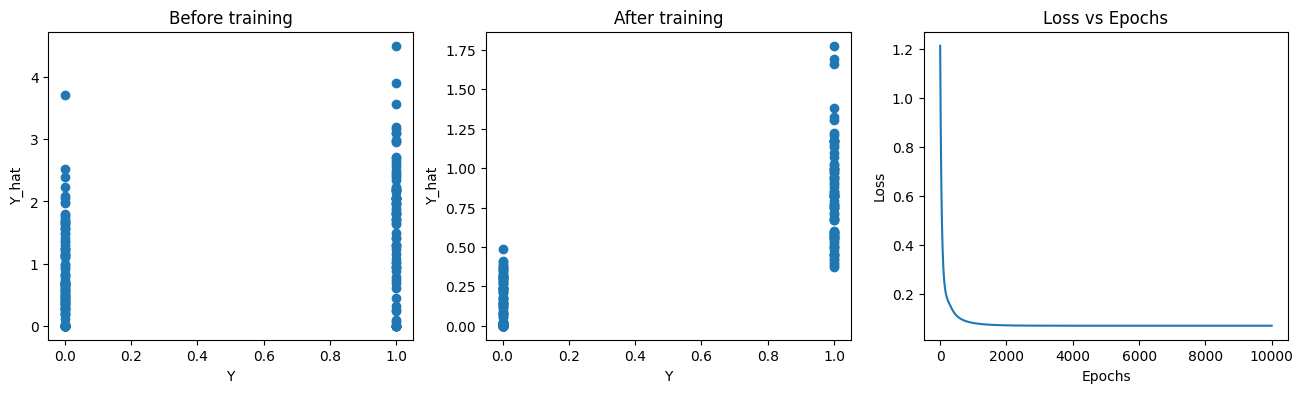

---

## **Training with activation function *linear***


Training failed! Exception: x and y must be the same size


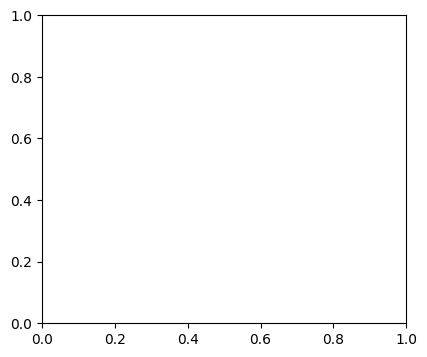

---

## **Training with activation function *sigmoid***


Training failed! Exception: x and y must be the same size


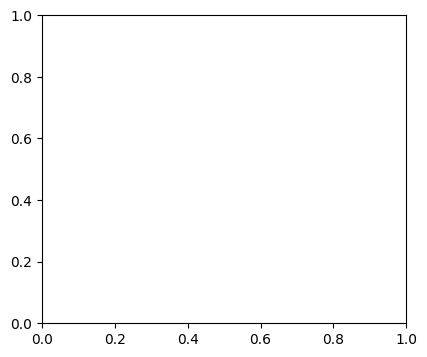

In [ ]:
#====================================================================
#          DO NOT CHANGE CODE HERE!!!
#====================================================================

# Run training and plot loss as well as regression line for each
# activation function.
training_info = {}
epochs = 10_000
alpha = 0.01

X = df[["x1", "x2", "x3"]].values
y = df["label"].values

for name in list(ACTIVATIONS.keys())[:3]:
    try:
        n = Neuron(X.shape[1], name)
        display(Markdown("---"))
        display(Markdown(f"## **Training with activation function *{name}***"))

        # Plot neuron output before training
        plt.figure(figsize=(16, 4))
        plt.subplot(1, 3, 1)
        plt.scatter(y, n.forward(X))
        plt.title("Before training")
        plt.xlabel("Y")
        plt.ylabel("Y_hat")

        # Train the neuron.
        losses = train_neuron(n, X, y, epochs, alpha)
        training_info[name] = {
            "losses": losses,
            "success": True,
        }

        # Plot neuron output after training.
        plt.subplot(1, 3, 2)
        plt.scatter(y, n.forward(X))
        plt.title("After training")
        plt.xlabel("Y")
        plt.ylabel("Y_hat")

        # Plot losses
        plt.subplot(1, 3, 3)
        plt.plot(losses)
        plt.title("Loss vs Epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")

    except Exception as e:
        # display(Markdown(f"*Training failed with an exception: **{str(e)}***"))
        training_info[name] = {
            "losses": [],
            "success": False,
        }
        print(f"\nTraining failed! Exception: {e}")

    plt.show()